In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from sqlalchemy import desc

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
Measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1a8ab28af48>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1a8ab2d90a8>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1a8ab2d9168>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1a8ab2d9228>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1a8ab2d92e8>,
              'tobs': <sqlalc

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date = session.query(Measurement, func.max(Measurement.date))
print(f"Latest Date : {date[0][1]}")
print("\n--------------\n")
# Calculate the date 1 year ago from the last data point in the database
datecheck = session.query(Measurement)\
    .filter(Measurement.date >= '2016-08-23').all()
for measure in datecheck:
    print(measure.date, measure.prcp)

# Perform a query to retrieve the data and precipitation scores


Latest Date : 2017-08-23

--------------

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-1

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Measure_df = pd.read_sql_query("SELECT * FROM Measurement A WHERE A.Date >= '2016-08-23'", con=engine)
# Station_db = pd.read_sql_table("station", con=engine)
# Sort the dataframe by date
Measure_df.head()
Measure_df = Measure_df.sort_values(by="date")


([<matplotlib.axis.XTick at 0x1a8aaae8388>,
 <a list of 8 Text xticklabel objects>)

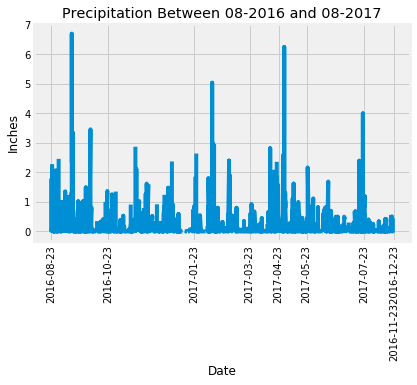

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
month= ['2016-08-23','2016-10-23','2016-11-23''2016-12-23','2017-01-23','2017-03-23','2017-04-23','2017-05-23','2017-07-23']

plt.plot(Measure_df["date"], Measure_df["prcp"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Between 08-2016 and 08-2017")
plt.xticks(month, rotation=90)

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(f"""
Precipitation Data
--------------------
{Measure_df["prcp"].describe()}
""")



Precipitation Data
--------------------
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64



In [15]:
# Design a query to show how many stations are available in this dataset?
date = session.query(Measurement).group_by(Measurement.station).count()
# numstat = Measure_df["station"].nunique()
# print(f"Number of unique stations : {numstat}")
print(date)

9


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(desc(Measurement.date)).all()
print("Station     Count")
print("-----------------")
for x, y in active:
    print(x,y)

Station     Count
-----------------
USC00517948 1372
USC00514830 2202
USC00519523 2669
USC00519397 2724
USC00519281 2772
USC00518838 511
USC00516128 2612
USC00513117 2709
USC00511918 1979


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?

def temp(function):
    q = session.query(Measurement, function(Measurement.tobs))\
        .filter(Measurement.station == "USC00519281")
    return q[0][1]

qmin = temp(func.min)
qmax = temp(func.max)
qmean = temp(func.avg)

print(f"""
TOBS from Station USC00519281
-----------------------------------
Maximum Temperature Recorded : {qmax}
Minimum Temperature Recorded : {qmin}
Average Temperature Recorded : {round(qmean,1)}
""")


TOBS from Station USC00519281
-----------------------------------
Maximum Temperature Recorded : 85.0
Minimum Temperature Recorded : 54.0
Average Temperature Recorded : 71.7



In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearhist = session.query(Measurement.tobs, Measurement.date)\
    .filter(Measurement.station == "USC00519281")\
    .filter(Measurement.date >= '2016-08-23')

print("TOBS Date")
print("---------------")
x_hist = []
for x,y in yearhist:
    print(x,y)
    x_hist.append(x)

In [ ]:
num_bins = 12

x = x_hist
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency for Station USC00519281")
plt.show()